## Demo: Simplified retail prediction pipeline for a single item

[**Link to Google Colab of this Notebook**](http://colab.research.google.com/github/acedesci/scanalytics/blob/master/EN/S08_09_Retail_Analytics/S8_Simple_Retail_Demand_Model.ipynb)

**NOTE:**
This is a simplified version of the predictive model shown in the Module 1 - Predictive Analytics Model. In this version, we run only the model for one item. Almost all of the parts of the codes folllow the same logic and process as the Module 1A [[Colab link for 1A]](https://colab.research.google.com/github/acedesci/scanalytics/blob/master/EN/S08_09_Retail_Analytics/S8_Module1A_Retail_Demand_Model.ipynb) but it is simplified to one product (UPC). Once you are familiar with this one, it will be easy to understand the demo 1A which consists of multiple items.

In order to continue for S9 for the optimization model, we still need to run the Module 1A. Thus, please also proceed and run the Module 1A and save the fitted models to your Google Drive or local folder.

We begin by loading the required packages.

In [1]:
import pandas
import numpy
import sklearn
from sklearn import *

import matplotlib.pyplot as plt

### Block 1: Data input

In addition to the original data, we add a new variable, which is the squared price ('PRICE_p2').

In [2]:
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/EN/S08_09_Retail_Analytics/salesCereals.csv'

salesCereals = pandas.read_csv(url)
salesCereals['PRICE_p2'] = salesCereals['PRICE']**2
salesCereals.head()

,Unnamed: 0,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,...,DISPLAY,TPR_ONLY,Desc,Category,Sub-Category,SUMPRICE,COUNTPRICE,AVGPRICE,RELPRICE,PRICE_p2
0,6,2009-01-14,367.0,1111085319,14.0,13.0,13.0,26.32,1.88,1.88,...,0.0,0.0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,19.54,7,2.791429,0.673490,3.5344
1,8,2009-01-14,367.0,1111085350,35.0,27.0,25.0,69.30,1.98,1.98,...,0.0,0.0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,19.54,7,2.791429,0.709314,3.9204
2,12,2009-01-14,367.0,1600027527,12.0,10.0,10.0,38.28,3.19,3.19,...,0.0,0.0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,19.54,7,2.791429,1.142784,10.1761
3,13,2009-01-14,367.0,1600027528,31.0,26.0,19.0,142.29,4.59,4.59,...,0.0,0.0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,19.54,7,2.791429,1.644319,21.0681
4,14,2009-01-14,367.0,1600027564,56.0,48.0,42.0,152.32,2.72,3.07,...,0.0,0.0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,19.54,7,2.791429,0.974411,7.3984


'UPC' stands for Universal Product Code, which can be understood as one SKU in this case and in our SCM terms in general. The code below helps us identify the SKUs by which we want to forecast and their corresponding data size (number of data instances). We can see that the number of instances for each UPC is similar and that there is no UPC with only a few data points. This is important because training a model on a small dataset may limit its generalization.

In [3]:
print(salesCereals.groupby('UPC').count())

            Unnamed: 0  WEEK_END_DATE  STORE_NUM  UNITS  VISITS  HHS  SPEND  \
UPC                                                                           
1111085319         156            156        156    156     156  156    156   
1111085350         156            156        156    156     156  156    156   
1600027527         156            156        156    156     156  156    156   
1600027528         156            156        156    156     156  156    156   
1600027564         155            155        155    155     155  155    155   
3000006340         133            133        133    133     133  133    133   
3800031829         155            155        155    155     155  155    155   

            PRICE  BASE_PRICE  FEATURE  DISPLAY  TPR_ONLY  Desc  Category  \
UPC                                                                         
1111085319    156         156      156      156       156   156       156   
1111085350    156         156      156      156       156

### Block 2: Feature engineering & preparation

We then organize the data by 'UPC.' The model presented here only runs on a predetermined subset of variables in the data. You can add or remove these explanatory variables based on your judgemental call.

Here we select only **one** upc to run the model.

In [4]:
feature_list = ['PRICE', 'PRICE_p2', 'FEATURE', 'DISPLAY','TPR_ONLY','RELPRICE']

productList = salesCereals['UPC'].unique()
upc = 1600027528

X = salesCereals.loc[salesCereals['UPC']==upc][feature_list]
y = salesCereals.loc[salesCereals['UPC']==upc]['UNITS']
  # Split into training and testing data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)


### Block 3: Model & algorithm (training & testing)

In the next two cells, we train and test two different types of models, namely Linear Regression and Tree Regression. The first line in each loop is to train the model and the second line is for testing the model's performance on unseen data. The next three lines compute the performance metrics we would like to measure. Then we compute metrics to show the performance of the model.

In [5]:
#Linear model

# Fit the model
regr = sklearn.linear_model.LinearRegression().fit(X_train,y_train)

# Measure the RSME on the training set
trainRMSE = numpy.sqrt(sklearn.metrics.mean_squared_error(y_train, regr.predict(X_train)))

# Prediction on the test set
y_pred = regr.predict(X_test)

# Measure the prediction performances on the test set
testMAE = sklearn.metrics.mean_absolute_error(y_test, y_pred)
testMAPE = numpy.mean(numpy.abs((y_test - y_pred) / y_test))
testRMSE = numpy.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))

print('Linear regression Summary - UPC:'+str(upc))
print('Training RMSE:' + str(round(trainRMSE,2)))
print('Testing MAE:' + str(round(testMAE,2)))
print('Testing MAPE:' + str(round(testMAPE,2)))
print('Testing RMSE:' + str(round(testRMSE,2)))


Linear regression Summary - UPC:1600027528
Training RMSE:9.07
Testing MAE:8.09
Testing MAPE:0.25
Testing RMSE:14.07


In order to see the impact of the price on the demand, we use a simple plot function below from mathplotlib to see how the demand would change when the price changes.

For more details of the plot function, please see: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

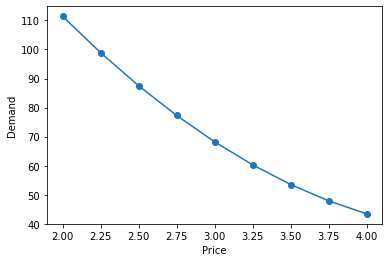

In [6]:
prices = [2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0]
input_x = []

# generate inputs for the plot using simple feature values and varying price points
for p in prices:
  input_x.append([p, p**2, 0,0,0, 1.0])

# obtain the predicted demands
predict_y = regr.predict(input_x)
plt.plot(prices, predict_y, marker='o')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.show()

Likewise, we obtain the tree regression results by simply changing the function name. Here you can try the regression tree and random forest (second model) if you outcomment it.

In [7]:
#Tree models
# regr = sklearn.tree.DecisionTreeRegressor(random_state = 0).fit(X_train,y_train) # standard regression tree
regr = sklearn.ensemble.RandomForestRegressor(random_state = 0).fit(X_train,y_train) # random forest tree

# Measure the RSME on the training set
trainRMSE = numpy.sqrt(sklearn.metrics.mean_squared_error(y_train, regr.predict(X_train)))

# Prediction on the test set
y_pred = regr.predict(X_test)

# Measure the prediction performances on the test set
testMAE = sklearn.metrics.mean_absolute_error(y_test, y_pred)
testMAPE = numpy.mean(numpy.abs((y_test - y_pred) / y_test))
testRMSE = numpy.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))

print('Tree regression Summary - UPC:'+str(upc))
print('Training RMSE:' + str(round(trainRMSE,2)))
print('Testing MAE:' + str(round(testMAE,2)))
print('Testing MAPE:' + str(round(testMAPE,2)))
print('Testing RMSE:' + str(round(testRMSE,2)))

Tree regression Summary - UPC:1600027528
Training RMSE:4.92
Testing MAE:8.7
Testing MAPE:0.28
Testing RMSE:14.53


In [8]:
# plot to see how the results look like when changing prices
prices = [2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0]
input_x = []

# generate inputs for the plot using simple feature values and varying price points
for p in prices:
  input_x.append([p, p**2, 0,0,0, 1.0])

input_x

[[2.0, 4.0, 0, 0, 0, 1.0],
 [2.25, 5.0625, 0, 0, 0, 1.0],
 [2.5, 6.25, 0, 0, 0, 1.0],
 [2.75, 7.5625, 0, 0, 0, 1.0],
 [3.0, 9.0, 0, 0, 0, 1.0],
 [3.25, 10.5625, 0, 0, 0, 1.0],
 [3.5, 12.25, 0, 0, 0, 1.0],
 [3.75, 14.0625, 0, 0, 0, 1.0],
 [4.0, 16.0, 0, 0, 0, 1.0]]

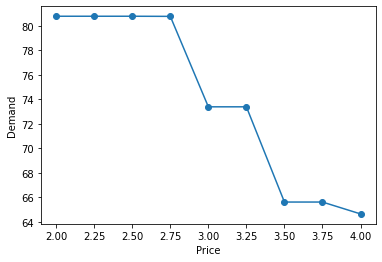

In [9]:
# obtain the predicted demands
predict_y = regr.predict(input_x)
plt.plot(prices, predict_y, marker='o')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.show()

### Block 4: Model selection

By comparing the average result, we can see that the linear regression model slightly outperformed the decision tree regression and did not overfit the data. In addtion, the predicted function has a better representation since the changes are monotonic (from the plots). Therefore, we proceed with the linear regression model for the whole dataset by replacing 'X_train' with 'X'. Given that the model has 'seen' the whole dataset, its forecast errors normally decrease. Therefore, we will save the trained model and use it for the new data which will be used in the optimization models in the next session.

In [10]:
# Selected model

# Fit the model on the entire dataset
regr = sklearn.linear_model.LinearRegression().fit(X,y)

# Prediction on the test set
y_pred = regr.predict(X)

# Measure the prediction performances on the entire dataset
overallMAE = sklearn.metrics.mean_absolute_error(y, y_pred)
overallMAPE = numpy.mean(numpy.abs((y - y_pred) / y))
overallRMSE = numpy.sqrt(sklearn.metrics.mean_squared_error(y, y_pred))

print('Regression Summary - UPC:'+str(upc))
print('Overall MAE:' + str(round(overallMAE,2)))
print('Overall MAPE:' + str(round(overallMAPE,2)))
print('Overall RMSE:' + str(round(overallRMSE,2)))

Regression Summary - UPC:1600027528
Overall MAE:7.06
Overall MAPE:0.3
Overall RMSE:10.43


### Save trained models

If you use Jupyter, you can save it to a local folder. The code below will put it in the current folder.

In [ ]:
cwd = './'

Now we can save the files to the folder indicated by using the code below.

In [ ]:
# save the models to drive (here we save model only for one UPC).
import pickle

filename = cwd+str(upc)+'_single_upc_demand_model.sav'
# save the model to disk
pickle.dump(regr, open(filename, 'wb'))